## Gradient Descent Implementation

### 문제 1
Real Estate 데이터셋 Housing.csv으로 Gradient Descent를 구현하세요.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

다음의 코드들을 실행하여 housing 변수에 데이터를 로드하고 데이터 전처리를 수행합니다.

In [ ]:
# 데이터셋을 불러옵니다
import pandas as pd

housing = pd.read_csv("./Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Yes를 1로, No를 0으로 변환
housing["mainroad"] = housing["mainroad"].map({"yes": 1, "no": 0})
housing["guestroom"] = housing["guestroom"].map({"yes": 1, "no": 0})
housing["basement"] = housing["basement"].map({"yes": 1, "no": 0})
housing["hotwaterheating"] = housing["hotwaterheating"].map({"yes": 1, "no": 0})
housing["airconditioning"] = housing["airconditioning"].map({"yes": 1, "no": 0})
housing["prefarea"] = housing["prefarea"].map({"yes": 1, "no": 0})

### 1-1 (7점) - 전처리
'furnishingstatus' 칼럼을 pd.get_dummies()를 이용하여 binary DataFrame으로 변환해주세요.(3점)
</br>
</br>
그 후 drop_first 파라미터를 이용하여 'furnished' 칼럼을 제거 후, concat을 이용하여 변환한 binary DataFrame과 기존의 housing DataFrame을 결합해주세요. (2점)
</br>
</br>
결합 후, 전체 DataFrame의 'furnishingstatus' 칼럼을 제거해주세요. (2점)

In [ ]:
# 'furnishingstatus' 칼럼을 pd.get_dummies()를 이용하여 binary DataFrame으로 변환
status = pd.get_dummies(housing["furnishingstatus"], drop_first=True)

# drop_first 파라미터를 이용하여 'furnished' 칼럼을 제거 후, concat을 이용하여 변환한 binary DataFrame과 기존의 housing DataFrame을 결합
housing = pd.concat([housing, status], axis=1)

# 결합 후, 전체 DataFrame의 'furnishingstatus' 칼럼을 제거
housing.drop(["furnishingstatus"], axis=1, inplace=True)

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


### 1-2 (5점) - 전처리

 <span style='color:orange'>두 방법의 결과가 반드시 같아야 합니다!!</span>

StandardScalar를 이용하여 housing DataFrame전체를 standardization 수행해주세요 .(2점)
</br>
</br>
동일한 과정을 수식을 이용하여 직접 구현해주세요. (2점)
</br>
* (힌트: 표본표준편차가 아닌 모표준편차로 계산하도록 파라미터를 조정하세요)
* $Z  = \frac {(X - m)}  {\sigma} $

두 방법이 같게 나오는지 첫 5행만 확인해보세요. (1점)



In [ ]:
# StandardScalar를 사용해주세요.
scalar = StandardScaler()
scaled_housing = scalar.fit_transform(housing)
housing = pd.DataFrame(scaled_housing, columns=housing.columns)

# 첫 5개의 행만 확인해주세요.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-0.844888,-0.696429
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-0.844888,-0.696429
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,1.183588,-0.696429
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-0.844888,-0.696429
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-0.844888,-0.696429


In [ ]:
# 수식으로 직접 구현해주세요.
housing = (housing - housing.mean()) / housing.std(ddof=0)

# 첫 5개의 행만 확인해주세요.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-0.844888,-0.696429
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-0.844888,-0.696429
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,1.183588,-0.696429
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-0.844888,-0.696429
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-0.844888,-0.696429


### 1-3 (15점) - Simple linear Regression
featue 데이터 세트 X에 'area' 칼럼을, target값 y에 'price'칼럼을 assign해주세요.(1점)
</br>
</br>
pairplot을 사용하여 <span style='color:orange'> 다음 그림과 같이 </span> 나타내주세요. (size=7, aspect=0.7로 지정해주세요) (2점)
</br>
</br>


In [ ]:
# Assign X
X = housing["area"]

# Assign y
y = housing["price"]

/Users/eric/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/eric/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


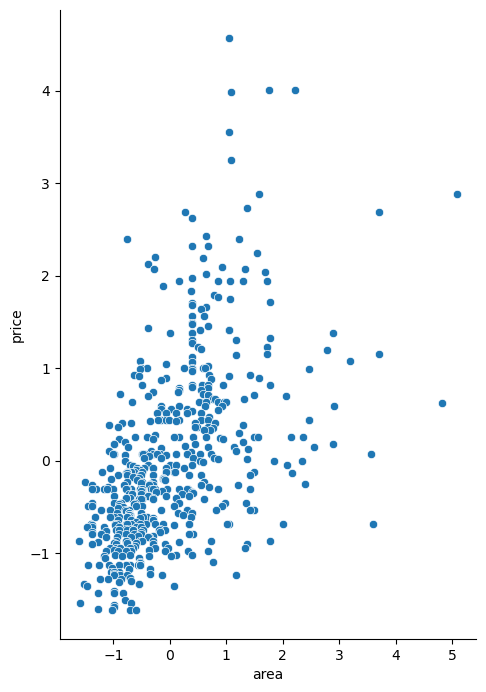

In [ ]:
# pairplot을 이용하여 그림과 동일하게 시각화해주세요.
sns.pairplot(housing, x_vars="area", y_vars="price", size=7, aspect=0.7, kind="scatter")

In [ ]:
# X, y를 각각 2차원 ndarray로 변환해줍니다.
import numpy as np

X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

X.shape, y.shape

((545, 1), (545, 1))

예측 오차 비용 계산을 수행하는 함수 get_cost를 생성해주세요. (1점)

In [ ]:
# 예측 오차 비용 계산을 수행하는 함수 생성
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

각 iteration 마다 w1, w0를 업데이트하고 cost를 계산할 get_weight_updates 함수를 생성해주세요. (3점)

In [ ]:

# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환.

def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factor = np.ones((N, 1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2 / N) * (learning_rate) * (np.dot(X.T, diff))
    w0_update = -(2 / N) * (learning_rate) * (np.dot(w0_factor.T, diff))

    # get_cost function을 이용하여 cost 변수에 예측 오차 비용을 assign
    cost = get_cost(y, y_pred)

    return w1_update, w0_update, cost

각 iteration별 w1, w0, cost를 기록할 gd_df DataFrame을 반환하는 함수 gradient_descent_steps를 생성해주세요. (4점)

In [ ]:

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=1000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 'w1', 'w0', 'cost'를 column으로 가지는 새로운 DataFrame gd_df 생성.
    gd_df = pd.DataFrame(columns=["w1", "w0", "cost"])

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행하고 cost 반환
    for ind in range(iters):
        w1_update, w0_update, cost = get_weight_updates(
            w1, w0, X, y, learning_rate=0.01
        )
        w1 -= w1_update
        w0 -= w0_update

        # gd_df에 각 iteration별 'w1', 'w0', 'cost'를 기재
        gd_df.loc[ind] = [w1[0, 0], w0[0, 0], cost]

    # gd_df를 반환
    return gd_df

gradient_descent_steps의 반환값을 이용하여 gd_df에 assign 해주세요.

In [ ]:
gd_df = gradient_descent_steps(X, y)

gd_df의 상위 5개 행의 정보가 다음과 일치하는지 확인하세요. (2점)

In [ ]:
# 다음의 코드를 실행해주세요: 그림과 같기만 하면 됩니다.

gd_df.head()

,w1,w0,cost
0,0.010720,1.100037e-18,1.000000
1,0.021225,-1.279303e-18,0.988623
2,0.031521,2.966027e-18,0.977697
3,0.041610,1.906732e-18,0.967203
4,0.051498,-1.874138e-19,0.957125


gd_df를 이용하여 다음의 그래프를 그려주세요. (x축: 'index' y축: 'cost', 힌트: reset_index()를 사용하세요) (2점)

<Axes: xlabel='index'>

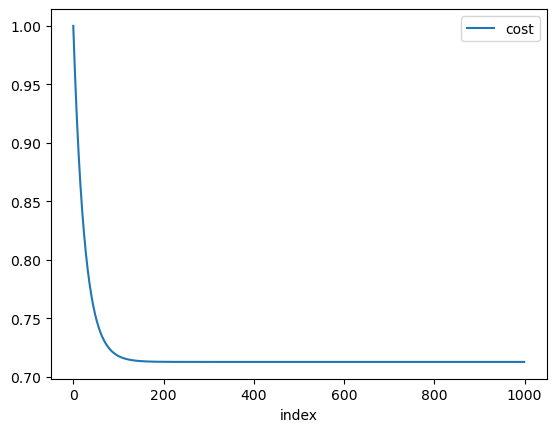

In [ ]:
# 그래프를 그려주세요
gd_df.reset_index().plot.line(x="index", y=["cost"])

### 1-4 (23점) - Linear Regression w/ Multiple Features
featue 데이터 세트 X에 'area', 'bedroom' 칼럼을, target값 y에 'price'칼럼을 assign해주세요.(1점)
</br>
</br>
값이 1만으로 되어있는 X에 'intercept' 칼럼을 추가해주시고, reindex를 이용하여 X의 칼럼 순서를 "intercept", "area", "bedrooms"으로 바꿔주세요 (1점)
</br>
</br>


In [ ]:
# Assign X
X = housing[["area", "bedrooms"]]

# Assign y
y = housing["price"]

In [ ]:

# columns of 1s을 X의 intercept 칼럼으로 추가해주세요.
X["intercept"] = 1

# reindex를 사용하여 X의 칼럼 순서를 바꿔주세요.
X = X.reindex(["intercept", "area", "bedrooms"], axis=1)
X.head()

/var/folders/xx/t2g6ggws01d3pfwzk8m969kr0000gn/T/ipykernel_76635/2832820216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["intercept"] = 1


,intercept,area,bedrooms
0,1,1.046726,1.403419
1,1,1.757010,1.403419
2,1,2.218232,0.047278
3,1,1.083624,1.403419
4,1,1.046726,1.403419


In [ ]:
# X, y를 2차원 ndarray로 변환
import numpy as np

X = np.array(X)
y = np.array(y).reshape(-1, 1)



예측 오차 비용 계산을 수행하는 함수 get_cost를 생성해주세요. (1점)

In [ ]:

# 예측 오차 비용 계산을 수행하는 함수 생성
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

(참고사항)

각 iteration 마다 w를 업데이트하고 cost를 계산할 get_weight_updates 함수를 생성해주세요. (5점)

In [ ]:

# w를 업데이트 할 w_update를 반환.
def get_weight_updates(w, X, y, learning_rate=0.01):
    N = len(y)

    # 먼저 w_update를 w의 shape와 동일한 크기를 가진 0 값으로 초기화
    w_update = np.zeros_like(w)

    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w)
    diff = y - y_pred

    # w을 업데이트할 w_update 계산
    w_update = -(1 / N) * (learning_rate) * (np.dot(X.T, diff))

    # get_cost function을 이용하여 cost 변수에 예측 오차 비용을 assign
    cost = get_cost(y, y_pred)

    return w_update, cost

각 iteration별 w, cost를 기록할 gd_df DataFrame을 반환하는 함수 gradient_descent_steps를 생성해주세요. (7점)

In [ ]:

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=1000):
    # w을 모두 0으로 초기화.
    w = np.zeros((3, 1))

    # 'w', 'cost'를 column으로 가지는 새로운 DataFrame gd_df 생성.
    gd_df = pd.DataFrame(columns=["w", "cost"])

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w 업데이트 수행하고 cost 반환
    for ind in range(iters):
        w_update, cost = get_weight_updates(w, X, y, learning_rate=0.01)
        w -= w_update
        # gd_df에 각 iteration별 'w', 'cost'를 기재
        gd_df.loc[ind] = [w.flatten(), cost]

    # gd_df를 반환
    return gd_df

In [ ]:
pd.set_option('display.max_colwidth', 100)

gd_df의 상위 5개 행의 정보가 다음과 일치하는지 확인하세요. (6점)

In [ ]:
# 다음의 코드를 실행해주세요: 사진과 결과만 같으면 됩니다.

gd_df = gradient_descent_steps(X, y)
gd_df.head()

,w,cost
0,"[1.7519115617938253e-19, 0.005359973457780798, 0.003664940257738677]",1.000000
1,"[-9.370689749129762e-20, 0.010660781658211174, 0.007285091538379784]",0.991616
2,"[-1.8333958204819102e-19, 0.015903084269726957, 0.010860991579158095]",0.983422
3,"[1.4667166563855279e-19, 0.021087533547479997, 0.01439317173817354]",0.975414
4,"[5.785382366854027e-19, 0.026214774417158263, 0.017882157069440255]",0.967588


gd_df를 이용하여 다음의 그래프를 그려주세요. (x축: 'index' y축: 'cost', 힌트: reset_index()를 사용하세요) (2점)

<Axes: xlabel='index'>

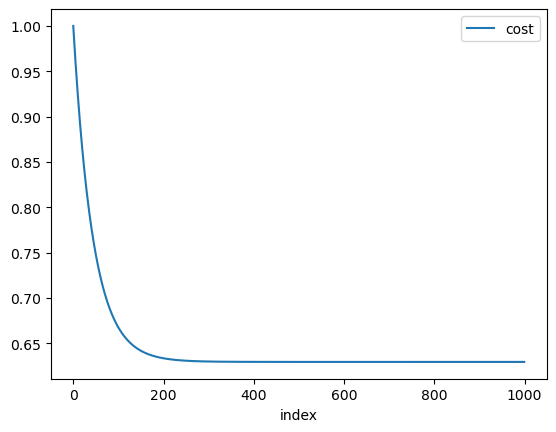

In [ ]:

# print cost
gradient_descent_steps(X, y).reset_index().plot.line(
    x="index", y=["cost"]
)

## 문제2

### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

#2. LinearRegression 클래스 - Ordinary Least Squares & 회귀 평가 지표

### 2-1. 아래 문제의 알파벳 값을 채워넣어 주세요. (6점, 각 2점)

(1) fit_intercept 파라미터에서 intercept 절편 값을 계산하지 않고 0으로 지정하고 싶다면 fit_intercept를 (a)로 지정해야한다.

(2) Ordinary Least Squeares 기반의 회귀 계수 계산은 입력 피처의 (b)에 많은 영향을 받는다.

(3) 피처 간의 상관 관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해지는데, 이러한 현상을 (c) 문제라고 한다.



답)
(a) False
(b) 독립성
(c) 다중공선성

### 2-2. 회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 합니다. 그런데, 이 두 값의 차이를 그냥 더하지 않고 절댓값 평균이나 제곱하여 지표로 사용하는 이유는 무엇일까요? (2점)

답) 실제값과 예측값의 차이를 그냥 더하면 +와 -가 섞여서 오류가 상쇄되기 때문에 정확한 지표가 될 수 없다.

### 2-3. cross_val_score나 GridSearchCV와 같은 Scoring 함수에 MAE, MSE, RMSE와 같은 회귀 평가 지표를 적용할 때, 'neg_', 즉 '-1'을 원래 평가 지표 값에 곱해서 음수로 만드는 이유는 무엇일까요? (2점)

답) 사이킷런의 scoring 함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하는데, 실제값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로, -1을 원래 평가 지표 값에 곱해서 음수를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 한다.

#문제3.  LinearRegression을 이용해 캘리포니아 주택 가격 회귀 구현

### 3-0. 아래의 코드를 실행하여 캘리포니아 주택 가격을 불러와주세요.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# boston 데이터 세트 로드
california = fetch_california_housing()

# boston 데이터 세트 DataFrame 변환
californiaDF = pd.DataFrame(california.data, columns = california.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
californiaDF['PRICE'] = california.target
print('California 데이터 세트 크기 :', californiaDF.shape)
californiaDF.head()

California 데이터 세트 크기 : (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 3-1. 아래 코드에서 종속변수와 독립변수를 나누고, 선형회귀OLS로 학습 및 예측을 진행해주세요.(4점)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = californiaDF['PRICE'] # y_target에 종속변수를 넣어주세요.
X_data = californiaDF.drop(['PRICE'], axis = 1, inplace = False) # X_data에 독립변수를 넣어주세요.(힌트 : 종속변수를 제외한 모든 변수가 독립변수가 됩니다!)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=2)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.539090, RMSE : 0.734
Variance score : 0.602


### 3-2. 아래 코드에서 회귀 계수들을 Series로 만들어서 회귀계수가 가장 큰 변수와 회귀계수가 가장 작은 변수 하나를 작성해주세요.(6점)

In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data= lr.coef_, index= X_data.columns)
coeff.sort_values(ascending=False)

AveBedrms     0.611526
MedInc        0.442798
HouseAge      0.009073
Population   -0.000004
AveOccup     -0.003927
AveRooms     -0.115072
Latitude     -0.407213
Longitude    -0.420488
dtype: float64

### 정답 작성
#### 가장 큰 회귀 계수의 변수 : AveBedrms
#### 가장 작은 회귀 계수의 변수 : Longitude

## 문제4. 다항 회귀 이해

#### 4-1 주어진 행렬을 4차 다항식으로 변환하고 변환된 다항식 계수 피처를 출력하세요

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2, 2)

#변환된 4차 다항식 계수 feature:
poly = PolynomialFeatures(degree=4)
poly.fit(X)
poly_ftr = poly.transform(X)
#poly_ftr = PolynomialFeatures(degree=4).fit_transform(X)
print( poly_ftr)

[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27. 16. 24. 36. 54. 81.]]


#### 4-2. 다음 3차 다항 회귀 함수에 대해 3차 다항식으로 변환하고 회귀 계수를 출력하세요(소수점 아래 세번쨰 자리까지 나타내세요)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 5*X[:,1]**3
    return(y)
X = np.arange(0,4).reshape(2,2)
y = polynomial_func(X)
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인\n",
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수' , np.round(model.coef_, 3))

Polynomial 회귀 계수 [0.    0.219 0.219 0.438 0.658 0.877 0.877 1.315 1.973 2.85 ]


#### 4-3사이킷런의 Pipeline 객체를 이용해 회귀계수를 구하겠습니다. 코드를 채워 넣어서 다음 함수의 회귀계수를 소수점 아래 둘째자리 까지 나타내세요.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
def polynomial_func(X):
    y = 4 + 3*X[:,0] + 2*X[:,0]**2 + 1*X[:,1]**3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결\n",
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)
model = model.fit(X, y)
print('Polynomial 회귀 계수', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 [0.   0.06 0.06 0.12 0.18 0.24 0.24 0.36 0.54 0.78]


## 문제5. 다항회귀를 이용한 과소적합 및 과적합 이해

### 1. 다음의 빈칸을 채우시오. (3점)

다항식의 차수가 높아질수록 학습데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어지는 과적합이 나타난다.


### 다음의 코드를 실행하시오

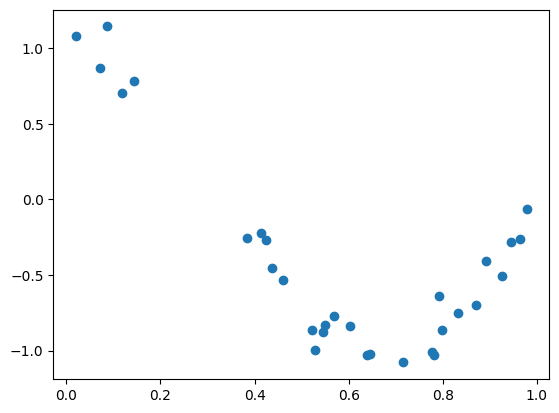

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1
plt.scatter(X, y)

### 2. 다음코드의 None값을 채워 예측 결과를 비교할 다항식 차수를 각각 1, 3, 13 으로 변경하면서 예측 결과를 비교하고, 차수별로 학습을 수행한 뒤 cross_val_score로 MSE 값을 구해 차수별 예측 성능을 평가하시오. 마지막으로 차수별 회귀 예측 곡선을 그리는 코드를 완성하시오. (4점)


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 3 회귀 계수는 [-2.2  -7.06  8.2 ] 입니다.
Degree 3 MSE 는 0.018747943073096025 입니다.

Degree 13 회귀 계수는 [ 1.82130000e+02 -6.20606000e+03  1.04045610e+05 -9.98445540e+05
  5.93307294e+06 -2.30761904e+07  6.08726077e+07 -1.10896334e+08
  1.39728876e+08 -1.19631136e+08  6.64603089e+07 -2.16163311e+07
  3.12555082e+06] 입니다.
Degree 13 MSE 는 1323101.407958284 입니다.


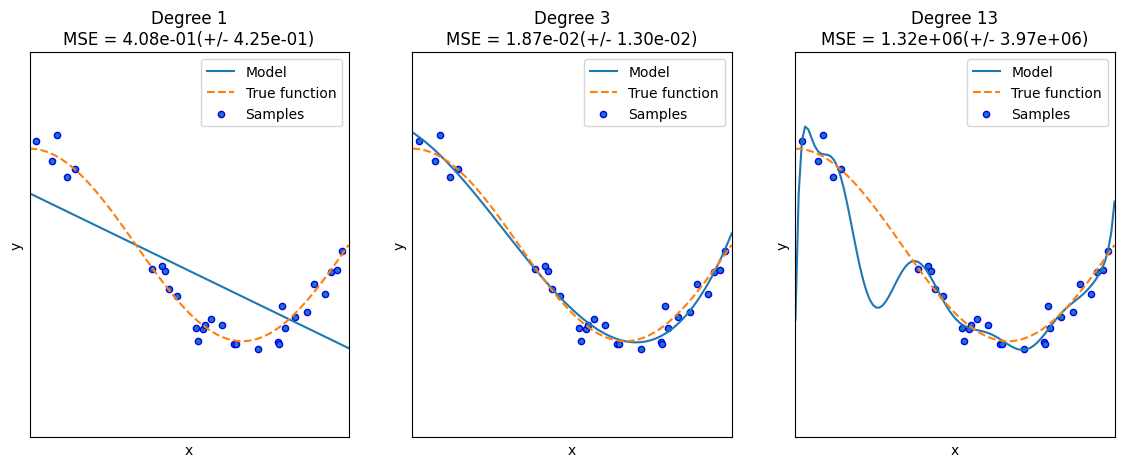

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 3, 13]

# 다항 회귀의 차수(degree)를 1, 3, 13로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

### 3. 위의 2번의 결과 중 과적합이 일어난 그래프는 어떤것인가? 또한 각각의 그래프를 보며 차수에 따른 예측곡선의 결과를 실제 데이터 세트와 비교하여 설명하고 성능에 관해서도 설명하시오. (3점)

세개의 그래프 중 과적합이 발생한 것은 degree13일때의 그래프이다. degree 1의 예측곡선은 단순한 직선서 선형회귀와 같으며 실제 데이터 세트에 비해 단순하다. degree3의 경우 실제 데이터 세트와 예측곡선이 가장 유사한 모습을 보여주며 MSE값도 가장 뛰어난 성능을 보여주고 있다. degree가 13일때의 예측곡선은 MSE값을 비교하였을때 성능이 가장 떨어지며, 학습 데이터만을 지나치게 반영하여 과적합이 심한 모델이 되었다.

## 문제6. 편향-분산 트레이드오프

### 다음 글을 읽고 @ 에 알맞은 말이 편향이면 1 분산이면 0으로 답해주세요. 답안 예) 1101101011 (각 1점)

1. 의사결정 트리의 가장 간단한 버전을 그루터기(stump) 라고 합니다. 그루터기는 고@@성을 가졌다고 표현합니다.
2. 지나치게 복잡한 트리는 @@으로 인한 오류가 발생합니다.  
3. @@으로 인한 오류를 줄이려면 트리에 추가 분할을 추가할 수 있습니다.
4. 고@@모델은 훈련데이터의 특이성에 과적합 하여 실수를 범합니다.
5. 모델이 덜 복잡하면 관련 정보를 무시하고 @@으로 인한 오류가 높습니다.
6. 모델이 복잡해질수록 @@으로 인한 오차는 줄어듭니다.
7. 모델이 덜 복잡하면 @@으로 인한 오류가 낮습니다.
8. 복잡성이 증가할수록 @@으로 인한 오류가 증가합니다.
9. 높은 @@ 낮은 @@에서 과소적합되기 쉽습니다.
10. 낮은 @@ 높은 @@에서 과적합 되기 쉽습니다.

## 문제7.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

7. 경사하강법 실습 (20점)


In [ ]:
np.random.seed(0)
X=2*np.random.rand(200,1)
y=3+2*X+np.random.randn(200,1)

7-1) xy데이터 세트를 산점도로 시각화하세요 (1점)

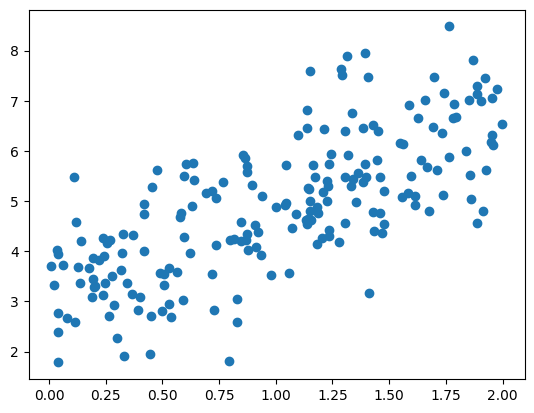

In [ ]:
#정답
plt.scatter(X,y)

7-2) 비용함수 정의 (3점)

In [ ]:
#정답

def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost

7-3) get_weight_updates 함수 생성하기 (5점)

In [ ]:
#정답

def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    y_pred=np.dot(X,w1.T)+w0
    diff=y-y_pred

    w0_factors=np.ones((N,1))
    w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

    return w1_update,w0_update

7-4)  gradient_descent 함수 생성 (5점)


경사하강 수행으로 w1 w0 을 업데이트 하는 함수를 생성해주세요

입력인자인 iters 는 10000으로 learning_rate는 0.05로 설정해주세요

In [ ]:
#정답

def gradient_des(X,y,iters=10000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    for ind in range(iters):
        w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.05)
        w1=w1-w1_update
        w0=w0-w0_update

    return w1,w0

7-5)  예측값과 실제값의 rss차이를 구하는 함수를 생성하세요

생성한 함수를 이용해 w1 w0 값과 경사 하강법의 에측오류를 구해주세요(5점)

In [ ]:
#정답

def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost

w1,w0= gradient_des(X,y,iters=1000)

print("w1:{0:.3f}w0:{1:.3f}".format(w1[0,0],w0[0,0]))

y_pred=w1[0,0]*X+w0

print('경사하강 예측오류:' ,get_cost(y,y_pred))

w1:1.781w0:3.107
경사하강 예측오류: 0.9130640526827253


7-6) 위에서 구한 값에 근거해 산점도 위에 회귀선을 그려주세요 (1점)

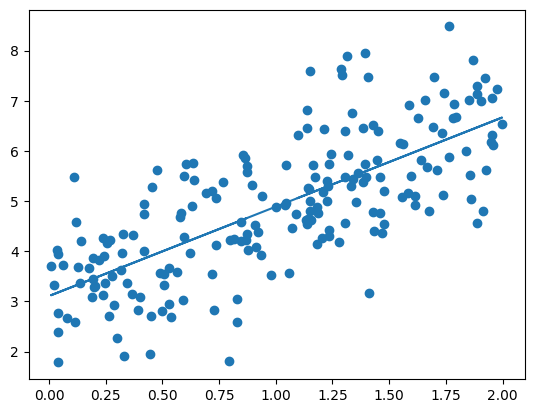

In [ ]:
#정답
plt.scatter(X,y)
plt.plot(X,y_pred)

## 문제8.회귀분석 실습 (30점)

아래코드를 실행해주세요

In [ ]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 24.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston=load_boston()

boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


8-1) 타겟 칼럼을 프레임에 추가해주세요 (1점)

In [ ]:
#정답
boston_df['PRICE']=boston.target

8-2)각 칼럼이 미치는 영향정도를 시각화해보겠습니다.

4개의 행 2개의 열
그래프로 총 8개 그래프를 그려주세요 (2점)

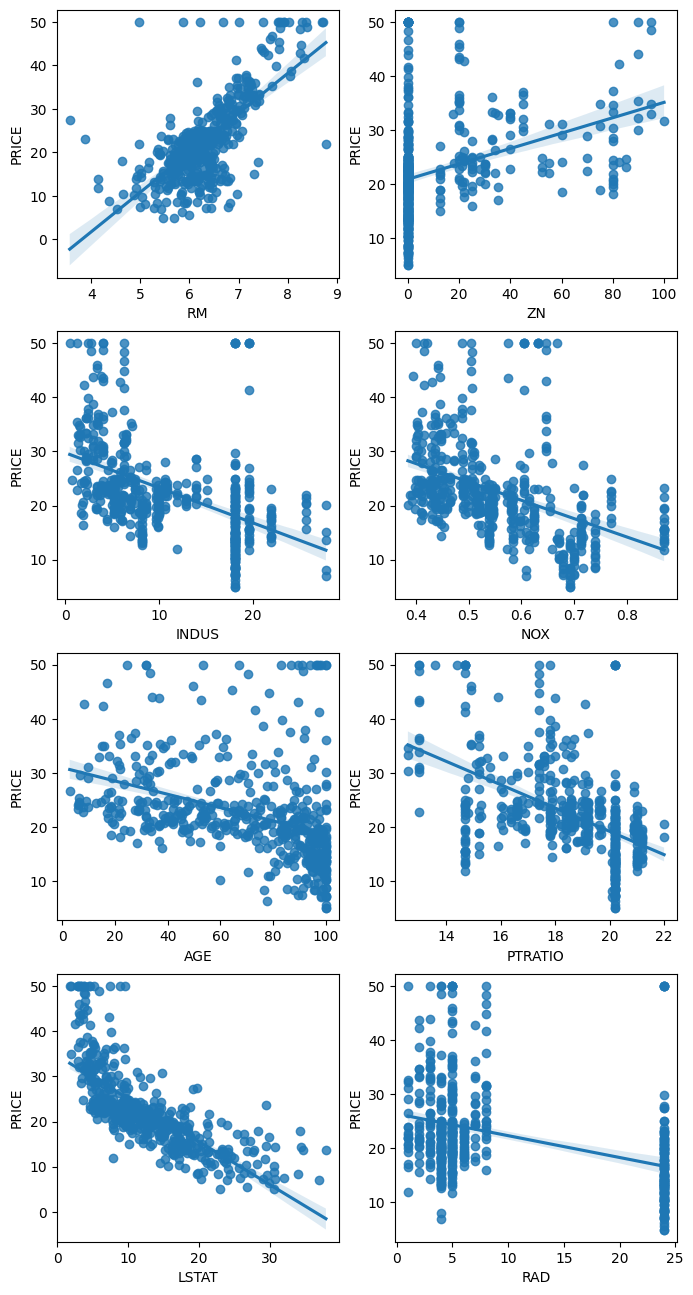

In [ ]:
#정답


fig, axs = plt.subplots(figsize=(8,16),ncols=2,nrows=4)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row=int(i/2)
    col=i%2
    sns.regplot(x=feature,y='PRICE',data=boston_df,ax=axs[row][col])

8-3) 회귀모델 생성 후 학습과 예측을 수행해주세요
그리고 mse,rmse,r2스코어를 각각 출력해주세요

(test_size=0.2 , random_state=156)

In [ ]:
#정답

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

y_target=boston_df['PRICE']
X_data=boston_df.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test=train_test_split( X_data, y_target, test_size=0.2,
                                               random_state=156)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('MSE:',mse)
print('RMSE:',rmse)
print('Vriance score:', r2_score(y_test,y_pred))

MSE: 18.140266604383086
RMSE: 4.259139185842966
Vriance score: 0.7854511954574206


8-4) coef_를 피처별 회귀 계수값으로 매핑하고 높은값 순으로 출력해주세요 (2점)

In [ ]:
#정답
coeff=pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        2.8
RAD         0.3
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.6
NOX       -20.1
dtype: float64

8-5) 교차검증을 통해MSE와 RMSE를 측정해보겠습니다.

폴드세트는 6개로 설정한 후

6폴드의 개별 NEG MSE SCORE, RMSE SCORE, 평균 RMSE 세가지를 소수점 3자리까지 출력해주세요(5점)

In [ ]:
#정답

from sklearn.model_selection import cross_val_score

y_target=boston_df['PRICE']
X_data=boston_df.drop(['PRICE'],axis=1,inplace=False)
lr=LinearRegression()

neg_mse_scores=cross_val_score(lr,X_data,y_target,scoring="neg_mean_squared_error",cv=6)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)
avg_rmse=np.mean(rmse_scores)

print('6폴드 개별 neg MSE SCORES:',np.round(neg_mse_scores,3))
print('6폴드 개별 RMSE scores:',np.round(rmse_scores,3))
print('6폴드 평균 RMSE:', avg_rmse)

6폴드 개별 neg MSE SCORES: [ -10.363  -26.9    -34.966  -15.807 -124.279  -22.388]
6폴드 개별 RMSE scores: [ 3.219  5.187  5.913  3.976 11.148  4.732]
6폴드 평균 RMSE: 5.695724762400135


8-6) 파이프라인 객체를 통한 다항회귀 구현 (10점)

In [ ]:
#정답

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

#다항식 Y=1 + 4*X1 + 1*X2**2 + 3*X3**3 을 결정 함수식으로 설정, 함수생성
def polynomial_func(X):
    y=y=1+4*X[:,0]+1*X[:,0]**2+3*X[:,1]**3
    return y

#사이킷런의 파이프라인 객체를 이용해 다항회귀를 구현 (degree=3)

model_p=Pipeline([('poly',PolynomialFeatures(degree=3)),
                  ('linear',LinearRegression())])
X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

#모델학습

model_p=model_p.fit(X,y)

#회귀계수 출력 (소수점 3자리까지)

print('polynomial 회귀계수',np.round(model_p.named_steps['linear'].coef_, 3))

polynomial 회귀계수 [0.    0.135 0.135 0.27  0.405 0.541 0.541 0.811 1.216 1.757]
